<a href="https://colab.research.google.com/github/ChetanKnowIt/PML_Notes/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
milkfile = '/content/gdrive/MyDrive/Datasets/milk.csv'
milk = pd.read_csv(milkfile, index_col=0)
milk.info()
milk.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, HORSE to DOLPHIN
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   water    25 non-null     float64
 1   protein  25 non-null     float64
 2   fat      25 non-null     float64
 3   lactose  25 non-null     float64
 4   ash      25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [ ]:
# we looked at the data and decided we need to transform the columns

scaler = StandardScaler()
milk_scaled = scaler.fit_transform(milk)

In [ ]:
milk_scaled

array([[ 0.94880628, -1.00929078, -0.90320785,  1.54221661, -1.03755398],
       [ 0.82140698, -1.34460333, -0.66061872,  1.04077335, -1.25994474],
       [ 0.81344452, -1.12106163, -0.73824724,  1.26363702, -1.38124879],
       [ 0.96473119, -1.26077519, -0.86439359,  1.15220518, -0.93646727],
       [ 0.97269365, -1.56814503, -0.56358307,  0.14931866, -1.54298752],
       [ 0.75770733, -0.75780637, -0.67032229,  0.37218233, -0.30972968],
       [ 0.69400768, -0.3945511 , -0.83528289,  0.87362559,  0.07439982],
       [ 0.31180978, -0.08718126, -0.23366185,  0.31646641, -0.16820828],
       [ 0.29588487,  0.33195943, -0.30158681, -0.79785195, -0.02668689],
       [ 0.2719975 ,  1.08641267, -0.38891889,  0.14931866, -0.22886031],
       [ 0.2719975 ,  0.10841772, -0.42773316,  0.42789825,  0.13505184],
       [ 0.66215786, -0.64603552, -0.68972942,  0.81790968, -0.1277736 ],
       [ 0.94084382, -1.17694705, -0.82557933,  0.76219376, -0.79494588],
       [ 0.36754698,  0.24813129, -0.5

In [ ]:
mergings = linkage(milk_scaled, method = 'average')

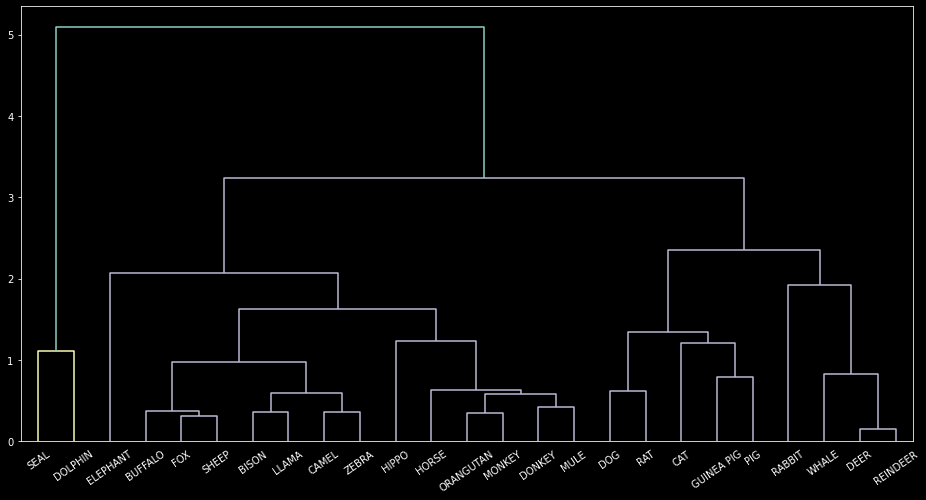

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16 # X scaling of fig 
fig_size[1] = 8 # Y scaling of fig
with plt.style.context('dark_background'):
  dendrogram(mergings, labels = list(milk.index), leaf_rotation=35, leaf_font_size = 10)
plt.show()

# Nutrient Dataset

In [ ]:
nutrient = '/content/gdrive/MyDrive/Datasets/nutrient.csv'
nutrient = pd.read_csv(nutrient, index_col=0)
nutrient.info()
nutrient.head()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, BEEF BRAISED to SHRIMP CANNED
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   energy   27 non-null     int64  
 1   protein  27 non-null     int64  
 2   fat      27 non-null     int64  
 3   calcium  27 non-null     int64  
 4   iron     27 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.3+ KB


,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [ ]:

scaler = StandardScaler()
nutrient_scaled = scaler.fit_transform(nutrient)
mergings = linkage(nutrient_scaled, method = 'average')

with plt.style.context('classic'):
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 32 # X scaling of fig 
  fig_size[1] = 8 # Y scaling of fig
  dendrogram(mergings, labels = list(nutrient.index), leaf_rotation=90, leaf_font_size = 10)
plt.show()

NameError: ignored

# K-Means Clustering


> Algorithm
1.   Start with k initial clusters at random: ⚖
2.   At every step, each record is reassigned to the cluster with closest centroid.
3. 







In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
milkfile = '/content/gdrive/MyDrive/Datasets/milk.csv'
milk = pd.read_csv(milkfile, index_col=0)
milk.info()
milk.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, HORSE to DOLPHIN
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   water    25 non-null     float64
 1   protein  25 non-null     float64
 2   fat      25 non-null     float64
 3   lactose  25 non-null     float64
 4   ash      25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


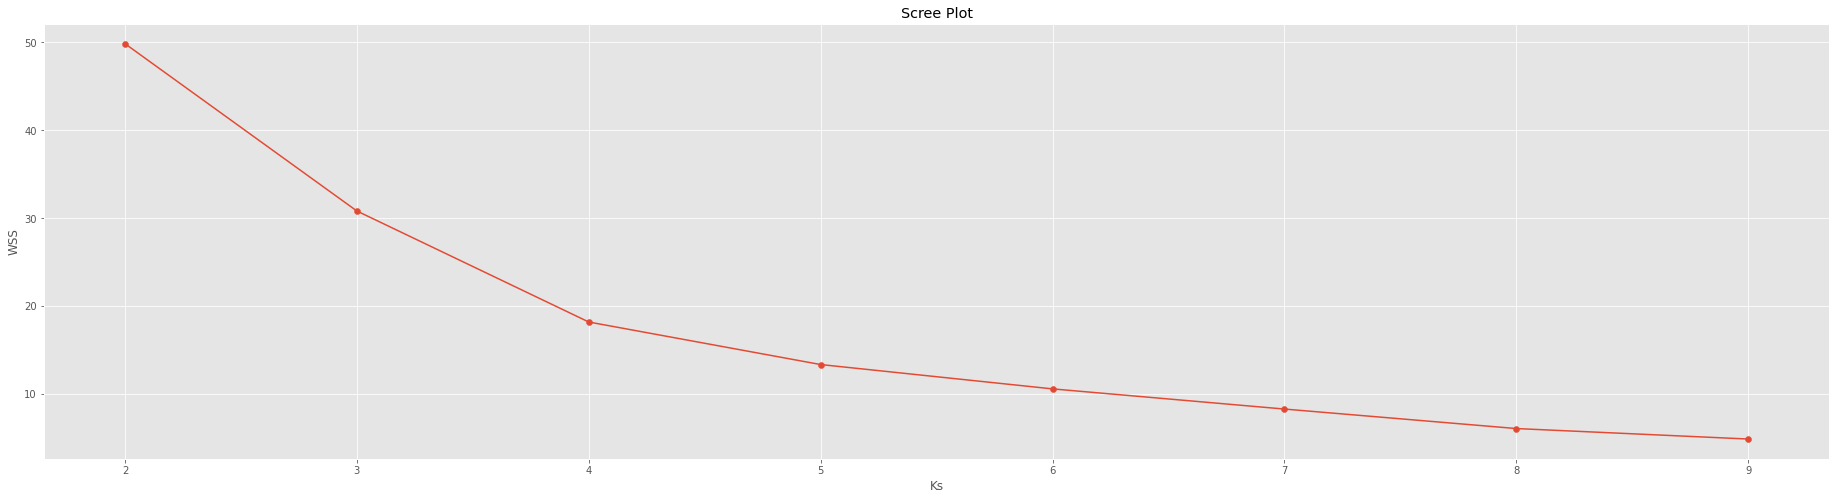

In [ ]:
#wss method
wss = []

for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(milk_scaled)
  wss.append(km.inertia_)

with plt.style.context('ggplot'):
  plt.scatter(np.arange(2,10), wss)
  plt.plot(np.arange(2,10), wss)
  plt.title("Scree Plot")
  plt.xlabel("Ks")
  plt.ylabel("WSS")
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 10 # X scaling of fig 
  fig_size[1] = 6 # Y scaling of fig
  #plt.style.context(style=)
  #print(plt.style.available)
  plt.show()


In [ ]:
print(plt.style.available)
# ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 
# 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 
# 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 
# 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 
# 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 
# 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
# Best Cluster is at 4 from the plot above
km = KMeans(n_clusters = 4, random_state = 2022)
km.fit(milk_scaled)
labels = km.predict(milk_scaled)

milk['Cluster'] = labels
milk.sort_values('Cluster', inplace = True)

#calculate centroids
milk.groupby('Cluster').mean()

,water,protein,fat,lactose,ash
Cluster,,,,,
0,79.875,6.95,8.2375,4.2125,0.89375
1,88.500,2.57,2.8000,5.6800,0.48500
2,67.860,10.74,17.3800,2.3800,1.64000
3,45.650,10.15,38.4500,0.4500,0.69000


In [ ]:
# Silhouette Score
sil = []
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(milk_scaled)
  labels = km.predict(milk_scaled)
  sil.append(silhouette_score(milk_scaled, labels))


Ks = np.arange(2,10)
print("Ks: ", Ks)
i_max = np.argmax(sil)
best_k = Ks[i_max]
print(best_k)
print(sil)

Ks:  [2 3 4 5 6 7 8 9]
3
[0.5258508931703421, 0.5391595072079529, 0.44607268416043655, 0.40926029392635116, 0.386462010908779, 0.3720658628104658, 0.39720929806300637, 0.4067070335363199]


by WSS method we found had concluded K as _4_ but by silhouette_score we find best_k value as _3_ which is lower so we accept silhouette_score as the better option

In [ ]:
# Silhouette Score
sil = []
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(nutrient_scaled)
  labels = km.predict(nutrient_scaled)
  sil.append(silhouette_score(nutrient_scaled, labels))

Ks = np.arange(2,10)
print("Ks: ", Ks)
i_max = np.argmax(sil)
best_k = Ks[i_max]
print(best_k)
print(sil)

Ks:  [2 3 4 5 6 7 8 9]
4
[0.32577846240602615, 0.40732090146799366, 0.42112362599603276, 0.4119959563384408, 0.3697503613650477, 0.3726092681245859, 0.4047937767281752, 0.38606918904783616]


In [ ]:
rfm = '/content/gdrive/MyDrive/Datasets/rfm_data_customer.csv'
rfm = pd.read_csv(rfm, index_col=0)
rfm.drop(columns=['most_recent_visit'], inplace = True)
rfm.info()
rfm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 22086 to 19184
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   revenue           39999 non-null  int64
 1   number_of_orders  39999 non-null  int64
 2   recency_days      39999 non-null  int64
dtypes: int64(3)
memory usage: 1.2 MB


,revenue,number_of_orders,recency_days
customer_id,,,
22086,777,9,232
2290,1555,16,115
26377,336,5,43
24650,1189,12,64
12883,1229,12,23


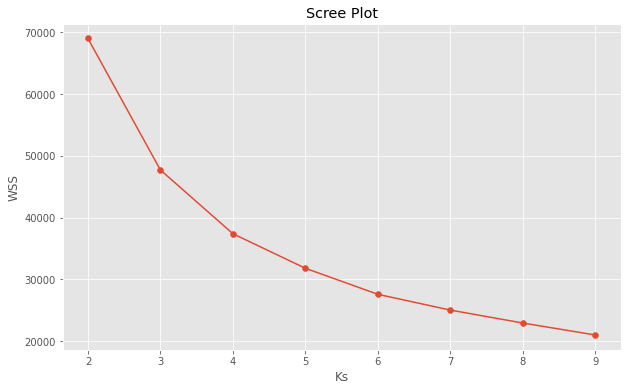

In [ ]:

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)
#wss method
wss = []

for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(rfm_scaled)
  wss.append(km.inertia_)

with plt.style.context('ggplot'):
  plt.scatter(np.arange(2,10), wss)
  plt.plot(np.arange(2,10), wss)
  plt.title("Scree Plot")
  plt.xlabel("Ks")
  plt.ylabel("WSS")
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 10 # X scaling of fig 
  fig_size[1] = 6 # Y scaling of fig
  #plt.style.context(style=)
  #print(plt.style.available)
  plt.show()

In [ ]:
# Silhouette Score
sil = []
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(rfm_scaled)
  labels = km.predict(rfm_scaled)
  sil.append(silhouette_score(rfm_scaled, labels))

Ks = np.arange(2,10)
print("Ks: ", Ks)
i_max = np.argmax(sil)
best_k = Ks[i_max]
print(best_k)

Ks:  [2 3 4 5 6 7 8 9]
3


In [ ]:
# Best Cluster is at best_k
km = KMeans(n_clusters = best_k, random_state = 2022)
km.fit(rfm_scaled)
labels = km.predict(rfm_scaled)
rfm['Cluster'] = labels
rfm.sort_values('Cluster', inplace = True)
#calculate centroids
rfm.groupby('Cluster').mean()

,revenue,number_of_orders,recency_days
Cluster,,,
0,752.325394,8.255605,135.857197
1,1284.438924,12.937297,133.228376
2,691.464651,7.344465,415.780084


# On Boston which is the best K?

In [ ]:
boston = '/content/gdrive/MyDrive/Datasets/Boston.csv'
boston = pd.read_csv(boston)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Ks:  [2 3 4 5 6 7 8 9]
2


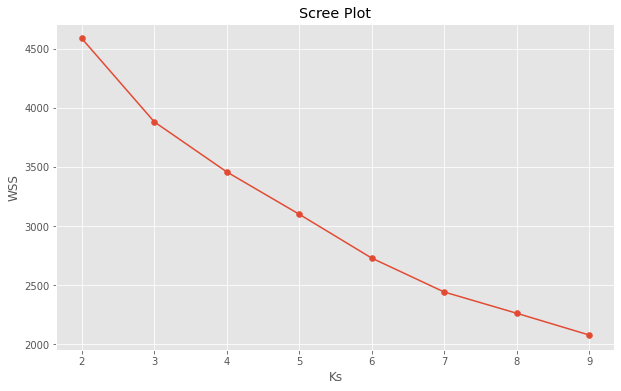

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
boston_scaled = scaler.fit_transform(boston)
# Silhouette Score
sil = []
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(boston_scaled)
  labels = km.predict(boston_scaled)
  sil.append(silhouette_score(boston_scaled, labels))

Ks = np.arange(2,10)
print("Ks: ", Ks)
i_max = np.argmax(sil)
best_k = Ks[i_max]
print(best_k)


#with wss
wss = []
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(boston_scaled)
  wss.append(km.inertia_)

with plt.style.context('ggplot'):
  plt.scatter(np.arange(2,10), wss)
  plt.plot(np.arange(2,10), wss)
  plt.title("Scree Plot")
  plt.xlabel("Ks")
  plt.ylabel("WSS")
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 10 # X scaling of fig 
  fig_size[1] = 6 # Y scaling of fig
  #plt.style.context(style=)
  #print(plt.style.available)
  plt.show()

# DBSCAN on milk data

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount('/content/gdrive')
milk = '/content/gdrive/MyDrive/Datasets/milk.csv'
milk = pd.read_csv(milk,index_col=0)

# Create scaler: scaler
scaler = StandardScaler()
milkscaled=scaler.fit_transform(milk)

clust_DB = DBSCAN(eps=0.4, min_samples=3)
clust_DB.fit(milkscaled)
print(clust_DB.labels_)

eps_range = [0.1,0.2,0.3,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for i in eps_range:
    for j in mp_range:
        clust_DB = DBSCAN(eps=i, min_samples=j)
        clust_DB.fit(milkscaled)
        if len(set(clust_DB.labels_)) >= 2:
            cnt = cnt + 1
            sil_sc = silhouette_score(milkscaled,clust_DB.labels_)
            a.append([cnt,i,j,sil_sc])
            print(i,j,sil_sc)
 
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[-1 -1 -1 -1 -1  0  0  1 -1 -1  1  0 -1 -1  0  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1]
0.2 2 0.17583990589921172
0.3 2 0.17583990589921172
0.4 2 -0.04604359194982988
0.4 3 -0.10510064116041587
0.6 2 0.11128849193649236
0.6 3 0.1716416331272206
0.6 4 0.15380744254580475
0.6 5 0.19699498436583696
1 2 0.2676764654728567
1 3 0.34346608316576144
1 4 0.4456667238577395
1 5 0.4456667238577395
Best Paramters:


,Sr,eps,min_pt,sil
10,11.0,1.0,4.0,0.445667
11,12.0,1.0,5.0,0.445667


# DBSCAN on nutrients.csv

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount('/content/gdrive')
nutrient = '/content/gdrive/MyDrive/Datasets/nutrient.csv'
nutrient = pd.read_csv(nutrient,index_col=0)

# Create scaler: scaler
scaler = StandardScaler()
nutrientscaled=scaler.fit_transform(nutrient)

clust_DB = DBSCAN(eps=0.4, min_samples=3)
clust_DB.fit(nutrientscaled)
print(clust_DB.labels_)

eps_range = [0.1,0.2,0.3,0.4,0.6,1]
mp_range = [2,3,4,5]
cnt = 0
a =[]
for eps in eps_range:
    for minp in mp_range:
        clust_DB = DBSCAN(eps=eps, min_samples=j)
        clust_DB.fit(nutrientscaled)
        if len(set(clust_DB.labels_)) >= 2:
            cnt = cnt + 1
            sil_sc = silhouette_score(nutrientscaled,clust_DB.labels_)
            a.append([cnt,eps,minp,sil_sc])
            print(cnt,eps,minp,sil_sc)
 
a = np.array(a)
pa = pd.DataFrame(a,columns=['Sr','eps','min_pt','sil'])
print("Best Paramters:")
pa[pa['sil'] == pa['sil'].max()]


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[ 0 -1 -1  0 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1]
1 0.4 2 0.20560704016956396
2 0.4 3 0.20560704016956396
3 0.4 4 0.20560704016956396
4 0.4 5 0.20560704016956396
5 0.6 2 0.20560704016956396
6 0.6 3 0.20560704016956396
7 0.6 4 0.20560704016956396
8 0.6 5 0.20560704016956396
9 1 2 0.24387369843497328
10 1 3 0.24387369843497328
11 1 4 0.24387369843497328
12 1 5 0.24387369843497328
Best Paramters:


,Sr,eps,min_pt,sil
8,9.0,1.0,2.0,0.243874
9,10.0,1.0,3.0,0.243874
10,11.0,1.0,4.0,0.243874
11,12.0,1.0,5.0,0.243874


# FEATURE EXTRACTION CLUSTERING

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

cd = '/content/gdrive/MyDrive/Datasets/Concrete_Data.csv'
cd = pd.read_csv(cd)
cd.info()

X = cd.drop('Strength', axis=1)
y = cd['Strength']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cd_scaled = scaler.fit_transform(X)
# Silhouette Score
sil = []
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(cd_scaled)
  labels = km.predict(cd_scaled)
  sil.append(silhouette_score(cd_scaled, labels))

Ks = np.arange(2,10)
print("Ks: ", Ks)
i_max = np.argmax(sil)
best_k = Ks[i_max]
print(best_k)
print(sil)


y = cd['Strength']
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(r2_score(y,y_pred))
X['Cluster'] = labels
X['Cluster'] = X['Cluster'].astype('category')
dum_cd = pd.get_dummies(X, drop_first=True)
y = cd['Strength']
lr = LinearRegression()
lr.fit(dum_cd,y)
y_pred = lr.predict(dum_cd)
print(r2_score(y,y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly               1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse            1030 non-null   float64
 6   Fine              1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
Ks:  [2 3 4 5 6 7 8 9]
7
[0.2043987811434291, 0.22029548175455604, 0.24785900719883316, 0.26533974730860727, 0.2858506637723893, 0.28867112224826236, 0.28699524896954276, 0.2842110190643605]
0.6155198704142721
0.6881711644733749


# Boston best K 

In [ ]:
boston = '/content/gdrive/MyDrive/Datasets/Boston.csv'
boston = pd.read_csv(boston)
boston.info()


X = boston.drop('medv', axis = 1)
y = boston['medv']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cd_scaled = scaler.fit_transform(X)
# Silhouette Score
sil = []
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(cd_scaled)
  labels = km.predict(cd_scaled)
  sil.append(silhouette_score(cd_scaled, labels))

Ks = np.arange(2,10)
print("Ks: ", Ks)
i_max = np.argmax(sil)
best_k = Ks[i_max]
print("Best K:", best_k)

# without cluster 
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(r2_score(y,y_pred))
print('0.36 is the largest number and others are near 0.25 so looking at sil values we see that only 2 clusters are possible')
print(sil)

# with cluster
X['Cluster'] = labels
X['Cluster'] = X['Cluster'].astype('category')
dum_boston = pd.get_dummies(X, drop_first=True)
lr = LinearRegression()
lr.fit(dum_boston,y)
y_pred = lr.predict(dum_boston)
print(r2_score(y,y_pred))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
Ks:  [2 3 4 5 6 7 8 9]
Best K: 2
0.7406426641094095
0.36 is the largest number and others are near 0.25 so looking at sil values we see that only 2 clusters are possible
[0.36011768587358617, 0.2574894522739463, 0.2898322145974091, 0.2

# Item analysis on Big Mart Dataset

1.   make new dataset from bigmart sales
2.   we verified with .info()
3. 
4. 



In [ ]:
bmp = '/content/gdrive/MyDrive/Datasets/bigmart_processed.csv' #also called as processed_train.csv
mycols = ['Item_Type','i_weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
bmp = pd.read_csv(bmp, usecols = mycols)
bmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   i_weight           8523 non-null   float64
 1   Item_Visibility    8523 non-null   float64
 2   Item_Type          8523 non-null   object 
 3   Item_MRP           8523 non-null   float64
 4   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(4), object(1)
memory usage: 333.1+ KB


In [ ]:

import re
listcols = [x for x in bmp.columns if re.search('^[iI]', x)]
print(listcols)

['i_weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Item_Outlet_Sales']


In [ ]:
print(bmp.shape)
item_means = bmp.groupby('Item_Type').mean()
print(item_means)
print(item_means.shape)

(8523, 5)
                        i_weight  Item_Visibility    Item_MRP  \
Item_Type                                                       
Baking Goods           12.275918         0.069169  126.380766   
Breads                 11.297689         0.066255  140.952669   
Breakfast              12.779727         0.085723  141.788151   
Canned                 12.403320         0.068129  139.763832   
Dairy                  13.375528         0.072427  148.499208   
Frozen Foods           12.778446         0.065645  138.503366   
Fruits and Vegetables  13.236713         0.068513  144.581235   
Hard Drinks            11.456238         0.064943  137.077928   
Health and Hygiene     13.052327         0.055216  130.818921   
Household              13.524780         0.061322  149.424753   
Meat                   12.771212         0.062284  139.882032   
Others                 13.979438         0.060241  132.851430   
Seafood                12.521953         0.074976  141.841719   
Snack Foods    

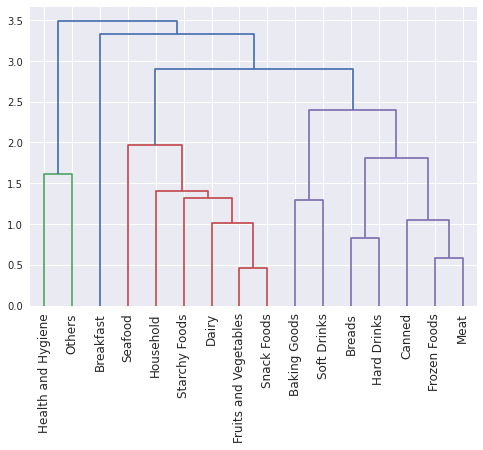

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
# we looked at the data and decided we need to transform the columns
scaler = StandardScaler()
item_means_scaled = scaler.fit_transform(item_means)
mergings = linkage(item_means_scaled, method = 'average')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 32 # X scaling of fig 
fig_size[1] = 8 # Y scaling of fig
with plt.style.context('seaborn'):
  dendrogram(mergings, labels = list(item_means.index), leaf_rotation=90, leaf_font_size = 12)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Silhouette Score
sil = []
for i in np.arange(2,10):
  km = KMeans(n_clusters = i, random_state =2022)
  km.fit(item_means_scaled)
  labels = km.predict(item_means_scaled)
  sil.append(silhouette_score(item_means_scaled, labels))



Ks = np.arange(2,10)
print("Ks: ", Ks)
i_max = np.argmax(sil)
best_k = Ks[i_max]
print("Best K:", best_k)



Ks:  [2 3 4 5 6 7 8 9]
Best K: 6


In [ ]:
X = item_means.drop('Item_Type', axis = 1)
y = item_means['Item_Type']

# without cluster 
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(r2_score(y,y_pred))
print('0.36 is the largest number and others are near 0.25 so looking at sil values we see that only 2 clusters are possible')
print(sil)

# with cluster
X['Cluster'] = labels
X['Cluster'] = X['Cluster'].astype('category')
dum_boston = pd.get_dummies(X, drop_first=True)
lr = LinearRegression()
lr.fit(dum_boston,y)
y_pred = lr.predict(dum_boston)
print(r2_score(y,y_pred))

KeyError: ignored